# Tugas 7 - Analisis Data Nasabah (Credit Risk)

## Preprocessing Data

In [39]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [40]:
dataset = pd.read_excel("https://raw.githubusercontent.com/febyfadlilah/dataset/main/credit_score.xlsx")

In [41]:
# Menampilkan data skor kredit
dataset.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [42]:
# Menampilkan data skor kredit
dataset.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


Transformasi Data Kategorikal to Numerik dengan One-Hot Encoding

In [43]:
# Mengambil kolom kpr aktif dan mentranformasikan menggunakan one-hot encoding
df_kpr_aktif=pd.get_dummies(dataset['kpr_aktif'])
df_kpr_aktif.head()

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [44]:
# Mengambil kolom rata-rata overdue mentranformasi menggunakan one-hot encoding
rata_rata_overdue=pd.get_dummies(dataset['rata_rata_overdue'])
rata_rata_overdue.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [45]:
# Mengambil data numeric
numeric = pd.DataFrame(dataset, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
numeric.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [46]:
# Menampilkan gabungan beberapa kolom yang telah diproses
dataset_baru = pd.concat([numeric, df_kpr_aktif, rata_rata_overdue], axis=1)
dataset_baru.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,4,0,1,0,0,0,1,0
1,AGR-000011,271,36,5,4,0,1,0,0,0,1,0
2,AGR-000030,159,12,0,1,1,0,1,0,0,0,0
3,AGR-000043,210,12,3,3,0,1,0,0,1,0,0
4,AGR-000049,165,36,0,2,1,0,0,1,0,0,0


In [47]:
# Mengambil kolom selain kode_kontrak dan risk_rating dan melakukan normalisasi data
normalisasi = dataset_baru.drop(["kode_kontrak", "risk_rating"], axis=1)

## Normalisas data dengan menggunakan Min Max

In [48]:
from sklearn.preprocessing import MinMaxScaler
# Melakukan scaler fitur
scaler = MinMaxScaler()
model =scaler.fit(normalisasi)
scaled_data=model.transform(normalisasi)
# Menampilkan scaler fitur
print(scaled_data)

[[0.97826087 1.         0.83333333 ... 0.         1.         0.        ]
 [0.87391304 0.66666667 0.83333333 ... 0.         1.         0.        ]
 [0.38695652 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.4173913  0.33333333 0.33333333 ... 0.         0.         0.        ]
 [0.54782609 1.         0.         ... 0.         0.         0.        ]
 [0.5826087  0.33333333 0.33333333 ... 0.         0.         0.        ]]


In [49]:
# Menampilkan data normalisasi dari min max
namakolom = normalisasi.columns.values
dataMinMax = pd.DataFrame(scaled_data, columns=namakolom)
dataMinMax.head()

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0.978261,1.000000,0.833333,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.873913,0.666667,0.833333,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.386957,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.608696,0.000000,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.413043,0.666667,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [50]:
# Min Max Scale dengan Min = 1 dan Max =2
scaler = MinMaxScaler(feature_range=(1,2))
model =scaler.fit(normalisasi)
scaled_data2=model.transform(normalisasi)
# Menampilkan skala fitur
print(scaled_data2)

[[1.97826087 2.         1.83333333 ... 1.         2.         1.        ]
 [1.87391304 1.66666667 1.83333333 ... 1.         2.         1.        ]
 [1.38695652 1.         1.         ... 1.         1.         1.        ]
 ...
 [1.4173913  1.33333333 1.33333333 ... 1.         1.         1.        ]
 [1.54782609 2.         1.         ... 1.         1.         1.        ]
 [1.5826087  1.33333333 1.33333333 ... 1.         1.         1.        ]]


In [51]:
# Menampilkan data normalisasi dari min=1 dan max=2
dataMinMax2 = pd.DataFrame(scaled_data2, columns=normalisasi.columns.values)
dataMinMax2.head()

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,1.978261,2.000000,1.833333,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1,1.873913,1.666667,1.833333,1.0,2.0,1.0,1.0,1.0,2.0,1.0
2,1.386957,1.000000,1.000000,2.0,1.0,2.0,1.0,1.0,1.0,1.0
3,1.608696,1.000000,1.500000,1.0,2.0,1.0,1.0,2.0,1.0,1.0
4,1.413043,1.666667,1.000000,2.0,1.0,1.0,2.0,1.0,1.0,1.0


## Normalisasi dengan Z-Score

In [52]:
# Melakukan normalisasi dengan z score atau standarscale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = (scaler.fit(normalisasi))
data_mean = (scaler.mean_)
scale_data = (scaler.transform(normalisasi))
print(scale_data)

[[ 2.54041987  1.32217147  1.03062105 ... -0.6912543   2.54950976
  -0.35949218]
 [ 2.07740679  0.4439764   1.03062105 ... -0.6912543   2.54950976
  -0.35949218]
 [-0.08332092 -1.31241375 -1.46147714 ... -0.6912543  -0.39223227
  -0.35949218]
 ...
 [ 0.05172456 -0.43421867 -0.46463786 ... -0.6912543  -0.39223227
  -0.35949218]
 [ 0.63049091  1.32217147 -1.46147714 ... -0.6912543  -0.39223227
  -0.35949218]
 [ 0.78482861 -0.43421867 -0.46463786 ... -0.6912543  -0.39223227
  -0.35949218]]


In [53]:
# Menampilkan data normalisasi dari z score
dataZScale = pd.DataFrame(scale_data, columns=normalisasi.columns.values)
dataZScale.head()

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,2.540420,1.322171,1.030621,-0.868554,0.868554,-0.580772,-0.463222,-0.691254,2.549510,-0.359492
1,2.077407,0.443976,1.030621,-0.868554,0.868554,-0.580772,-0.463222,-0.691254,2.549510,-0.359492
2,-0.083321,-1.312414,-1.461477,1.151339,-1.151339,1.721847,-0.463222,-0.691254,-0.392232,-0.359492
3,0.900582,-1.312414,0.033782,-0.868554,0.868554,-0.580772,-0.463222,1.446646,-0.392232,-0.359492
4,0.032432,0.443976,-1.461477,1.151339,-1.151339,-0.580772,2.158791,-0.691254,-0.392232,-0.359492


Menggabungkan Kolom Normlisasi

In [54]:
# Mengambil kolom kode kontak dan risk rating
data_kontrak_risk= pd.DataFrame(dataset, columns=['kode_kontrak','risk_rating'])

In [55]:
# Menggabungkan kolom yang sudah dinormalisasi dan data sebelumnya
kredit_min_max = pd.concat([data_kontrak_risk, dataMinMax], axis=1)
kredit_min_max.head()

,kode_kontrak,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,4,0.978261,1.000000,0.833333,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,AGR-000011,4,0.873913,0.666667,0.833333,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,AGR-000030,1,0.386957,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,AGR-000043,3,0.608696,0.000000,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,AGR-000049,2,0.413043,0.666667,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [56]:
# Menggabungkan kolom yang sudah dinormalisasi dan data sebelumnya
kredit_min1_max2 = pd.concat([data_kontrak_risk, dataMinMax2], axis=1)
kredit_min1_max2.head()

,kode_kontrak,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,4,1.978261,2.000000,1.833333,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1,AGR-000011,4,1.873913,1.666667,1.833333,1.0,2.0,1.0,1.0,1.0,2.0,1.0
2,AGR-000030,1,1.386957,1.000000,1.000000,2.0,1.0,2.0,1.0,1.0,1.0,1.0
3,AGR-000043,3,1.608696,1.000000,1.500000,1.0,2.0,1.0,1.0,2.0,1.0,1.0
4,AGR-000049,2,1.413043,1.666667,1.000000,2.0,1.0,1.0,2.0,1.0,1.0,1.0


In [57]:
# Menggabungkan kolom yang sudah dinormalisasi Z score dan data sebelumnya
kredit_Zscore = pd.concat([data_kontrak_risk, dataZScale], axis=1)
kredit_Zscore.head()

,kode_kontrak,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,4,2.540420,1.322171,1.030621,-0.868554,0.868554,-0.580772,-0.463222,-0.691254,2.549510,-0.359492
1,AGR-000011,4,2.077407,0.443976,1.030621,-0.868554,0.868554,-0.580772,-0.463222,-0.691254,2.549510,-0.359492
2,AGR-000030,1,-0.083321,-1.312414,-1.461477,1.151339,-1.151339,1.721847,-0.463222,-0.691254,-0.392232,-0.359492
3,AGR-000043,3,0.900582,-1.312414,0.033782,-0.868554,0.868554,-0.580772,-0.463222,1.446646,-0.392232,-0.359492
4,AGR-000049,2,0.032432,0.443976,-1.461477,1.151339,-1.151339,-0.580772,2.158791,-0.691254,-0.392232,-0.359492


Membagi Data menjadi data testing dan training dengan pengujian Min Max

In [58]:
# Mengambil kelas dan fitur dari dataset
# fiturnya
X_min_max = kredit_min_max.iloc[:,2:12].values
# classnya
y_min_max = kredit_min_max.iloc[:,1].values

In [59]:
# Membagi data menjadi data training dan data uji dengan data uji berjumlah 30%
from sklearn.model_selection import train_test_split
X_trainn_min_max, X_testn_min_max, y_trainn_min_max, y_testn_min_max = train_test_split(X_min_max, y_min_max, test_size=0.30, random_state=0, stratify=y_min_max)

In [60]:
# Mengambil kelas dan fitur dari dataset dan diuji dengan min = 1 dan max = 2
# fiturnya
X_min1_max2 = kredit_min1_max2.iloc[:,2:12].values
# classnya
y_min1_max2 = kredit_min1_max2.iloc[:,1].values

In [61]:
# Membagi data menjadi data training dan data uji dengan data uji berjumlah 30%
X_trainn_min1_max2, X_testn_min1_max2, y_trainn_min1_max2, y_testn_min1_max2 = train_test_split(X_min1_max2, y_min1_max2, test_size=0.30, random_state=0, stratify=y_min1_max2)

Membagi data menjadi data training dan uji dengan Z-Score

In [62]:
# Mengambil kelas dan fitur dari dataset
# fiturnya
X_Zscore = kredit_Zscore.iloc[:,2:12].values
# classnya
y_Zscore = kredit_Zscore.iloc[:,1].values

In [63]:
# Membagi data menjadi data training dan data uji dengan data uji berjumlah 30%
X_trainn_Zscore, X_testn_Zscore, y_trainn_Zscore, y_testn_Zscore = train_test_split(X_Zscore, y_Zscore, test_size=0.30, random_state=0, stratify=y_Zscore)

## Model Naive Bayes

In [64]:
# Melakukan import library yang diperlukan
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [65]:
# Menghitung akurasi presisi dari naive bayes dengan normalisasi min max
gaussian = GaussianNB()
gaussian.fit(X_trainn_min_max, y_trainn_min_max)
Y_predn_min_max = gaussian.predict(X_testn_min_max) 
accuracy_n_min_max=round(accuracy_score(y_testn_min_max,Y_predn_min_max)* 100, 2)
acc_gaussian = round(gaussian.score(X_trainn_min_max, y_trainn_min_max) * 100, 2)

confusion_m_min_max = confusion_matrix(y_testn_min_max, Y_predn_min_max)
accuracy_n_min_max = accuracy_score(y_testn_min_max,Y_predn_min_max)
precision_n_min_max =precision_score(y_testn_min_max, Y_predn_min_max,average='micro')
recall_n_min_max =  recall_score(y_testn_min_max, Y_predn_min_max,average='micro')
f1_n_min_max = f1_score(y_testn_min_max,Y_predn_min_max,average='micro')
print('Confusion matrix untuk Naive Bayes\n',confusion_m_min_max)
print('Akurasi Naive Bayes: %.3f' %accuracy_n_min_max)
print('Precision Naive Bayes: %.3f' %precision_n_min_max)
print('Recall Naive Bayes: %.3f' %recall_n_min_max)
print('f1-score Naive Bayes : %.3f' %f1_n_min_max)

Confusion matrix untuk Naive Bayes
 [[68  0  0  0  0]
 [ 0 48  0  0  0]
 [ 0  0 87  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 31]]
Akurasi Naive Bayes: 1.000
Precision Naive Bayes: 1.000
Recall Naive Bayes: 1.000
f1-score Naive Bayes : 1.000


Naive Bayes dengan Normalisasi Min = 1 dan Max = 2

In [66]:
# Menghitung akurasi presisi dari naive bayes dengan normalisasi min=1 dan max=2
gaussian = GaussianNB()
gaussian.fit(X_trainn_min1_max2, y_trainn_min1_max2)
Y_predn_min1_max2 = gaussian.predict(X_testn_min1_max2) 
accuracy_n_min1_max2=round(accuracy_score(y_testn_min1_max2,Y_predn_min1_max2)* 100, 2)
acc_gaussian = round(gaussian.score(X_trainn_min1_max2, y_trainn_min1_max2) * 100, 2)

confusion_m_min1_max2 = confusion_matrix(y_testn_min1_max2, Y_predn_min1_max2)
accuracy_n_min1_max2 = accuracy_score(y_testn_min1_max2,Y_predn_min1_max2)
precision_n_min1_max2 =precision_score(y_testn_min1_max2, Y_predn_min1_max2,average='micro')
recall_n_min1_max2 =  recall_score(y_testn_min1_max2, Y_predn_min1_max2,average='micro')
f1_n_min1_max2 = f1_score(y_testn_min1_max2,Y_predn_min1_max2,average='micro')
print('Confusion matrix untuk Naive Bayes\n',confusion_m_min1_max2)
print('Akurasi Naive Bayes: %.3f' %accuracy_n_min1_max2)
print('Precision Naive Bayes: %.3f' %precision_n_min1_max2)
print('Recall Naive Bayes: %.3f' %recall_n_min1_max2)
print('f1-score Naive Bayes : %.3f' %f1_n_min1_max2)

Confusion matrix untuk Naive Bayes
 [[68  0  0  0  0]
 [ 0 48  0  0  0]
 [ 0  0 87  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 31]]
Akurasi Naive Bayes: 1.000
Precision Naive Bayes: 1.000
Recall Naive Bayes: 1.000
f1-score Naive Bayes : 1.000


Naive Bayes dengan Normalisasi Z-Score

In [67]:
# Menghitung akurasi presisi dari naive bayes dengan normalisasi z score
gaussian = GaussianNB()
gaussian.fit(X_trainn_Zscore, y_trainn_Zscore)
Y_predn_Zscore = gaussian.predict(X_testn_Zscore) 
accuracy_n_Zscore=round(accuracy_score(y_testn_Zscore,Y_predn_Zscore)* 100, 2)
acc_gaussian = round(gaussian.score(X_trainn_Zscore, y_trainn_Zscore) * 100, 2)

confusion_m_Zscore = confusion_matrix(y_testn_Zscore, Y_predn_Zscore)
accuracy_n_Zscore = accuracy_score(y_testn_Zscore,Y_predn_Zscore)
precision_n_Zscore =precision_score(y_testn_Zscore, Y_predn_Zscore,average='micro')
recall_n_Zscore =  recall_score(y_testn_Zscore, Y_predn_Zscore,average='micro')
f1_n_Zscore = f1_score(y_testn_Zscore,Y_predn_Zscore,average='micro')
print('Confusion matrix untuk Naive Bayes\n',confusion_m_Zscore)
print('Akurasi Naive Bayes: %.3f' %accuracy_n_Zscore)
print('Precision Naive Bayes: %.3f' %precision_n_Zscore)
print('Recall Naive Bayes: %.3f' %recall_n_Zscore)
print('f1-score Naive Bayes : %.3f' %f1_n_Zscore)

Confusion matrix untuk Naive Bayes
 [[68  0  0  0  0]
 [ 0 48  0  0  0]
 [ 0  0 87  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 31]]
Akurasi Naive Bayes: 1.000
Precision Naive Bayes: 1.000
Recall Naive Bayes: 1.000
f1-score Naive Bayes : 1.000


## Model KNN

KNN dengan Normalisasi Min Max

In [68]:
# Menghitung akurasi dari KNN dengan normalisasi min dan max
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_trainn_min_max, y_trainn_min_max)

acc_knn = round(neigh.score(X_trainn_min_max, y_trainn_min_max) * 100, 2)
print("Akurasi KNN :",acc_knn)

Akurasi KNN : 99.68


KNN dengan Normalisasi Z Score

In [69]:
# Menghitung akurasi dari KNN dengan normalisasi z score
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_trainn_Zscore, y_trainn_Zscore)

acc_knn = round(neigh.score(X_trainn_Zscore, y_trainn_Zscore) * 100, 2)
print("Akurasi KNN :",acc_knn)

Akurasi KNN : 100.0


## Decision Tree

In [70]:
# Import library yang diperlukan pada decision tree
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot as plt

Decision Tree dengan Normalisasi Min dan Max

In [71]:
# Menghitung akurasi dengan menggunakan gini indek dengan normalisasi min max
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_trainn_min_max, y_trainn_min_max)

y_predn_min_max = clf.predict(X_testn_min_max)
print("Accuracy_Decision Tree :",metrics.accuracy_score(y_testn_min_max,y_predn_min_max))

Accuracy_Decision Tree : 1.0


Decision Tree dengan Normalisasi Min = 1 dan Max = 2

In [72]:
# Menghitung akurasi dengan menggunakan gini indek dengan normalisasi Min=1 dan Max=2
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_trainn_min1_max2, y_trainn_min1_max2)

y_predn_min1_max2 = clf.predict(X_testn_min1_max2)
print("Accuracy_Decision Tree :",metrics.accuracy_score(y_testn_min1_max2, y_predn_min1_max2))

Accuracy_Decision Tree : 1.0


## Decision Tree

Decision Tree dengan Normalisasi Z-Score

In [73]:
# Menghitung akurasi dengan menggunakan gini indek dengan normalisasi Z Score
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X_trainn_Zscore, y_trainn_Zscore)

y_predn_Zscore = clf.predict(X_testn_Zscore)
print("Accuracy_Decision Tree :",metrics.accuracy_score(y_testn_Zscore,y_predn_Zscore))

Accuracy_Decision Tree : 1.0


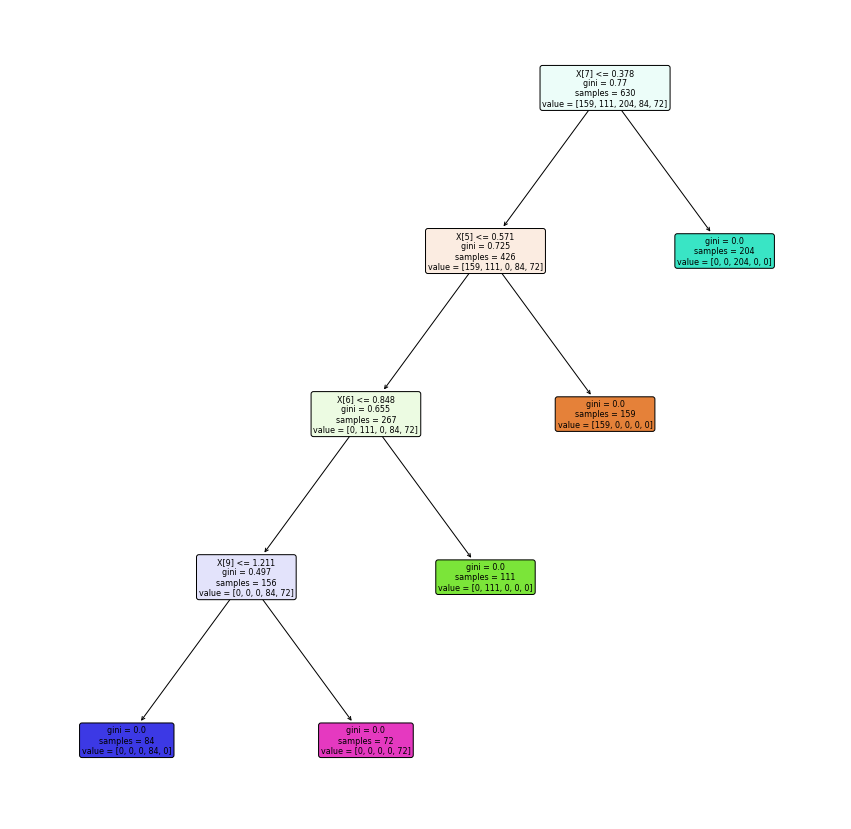

In [74]:
# gambar bentuk decision tree
plt.figure(figsize=(15,15))
#Membuat plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#Menampilkan plot
plt.show()

# Tugas 8 - Penerapan Bagging Ensemble Learning Data Credit Risk

In [75]:
# Import library yang diperlukan
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [76]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=10, random_state=0).fit(X_trainn_min_max, y_trainn_min_max)
rsb = clf.predict(X_testn_min_max)
b = ['Decision Tree']
Tree = pd.DataFrame(rsb,columns = b)

In [77]:
X_testn_min_max.shape

(270, 10)

In [78]:
K = 10
clf = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors = K),n_estimators=10, random_state=0).fit(X_trainn_min_max, y_trainn_min_max)
rsa = clf.predict(X_testn_min_max)
a = ['KNN']
KNN = pd.DataFrame(rsa,columns = a)

In [79]:
clf = BaggingClassifier(base_estimator=GaussianNB(),n_estimators=10, random_state=0).fit(X_trainn_min_max, y_trainn_min_max)
rsc = clf.predict(X_testn_min_max)
c = ['Naive Bayes']
Bayes = pd.DataFrame(rsc,columns = c)

In [80]:
Result = pd.concat([Tree, KNN,Bayes], axis=1)
Result

,Decision Tree,KNN,Naive Bayes
0,4,4,4
1,3,3,3
2,1,1,1
3,3,3,3
4,3,3,3
...,...,...,...
265,1,1,1
266,4,4,4
267,1,1,1
268,3,3,3


In [81]:
bagging_accuracy1 = round(100 * accuracy_score(y_testn_min_max, Bayes), 2)
bagging_accuracy2 = round(100 * accuracy_score(y_testn_min_max, Tree), 2)
bagging_accuracy3 = round(100 * accuracy_score(y_testn_min_max, KNN), 2)
print('The accuracy of this model is Bagging Naive Bayes {} %.'.format(bagging_accuracy1))
print('The accuracy of this model is Bagging Decision Tree {} %.'.format(bagging_accuracy2))
print('The accuracy of this model is Bagging kNN {} %.'.format(bagging_accuracy3))

The accuracy of this model is Bagging Naive Bayes 100.0 %.
The accuracy of this model is Bagging Decision Tree 100.0 %.
The accuracy of this model is Bagging kNN 99.63 %.


# Tugas 9 - Penerapan Stacking Ensemble Learning Data Credit Risk

In [82]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [83]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('neigh', KNeighborsClassifier(n_neighbors=3)) 
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=DecisionTreeClassifier()
)

In [84]:
clf.fit(X_trainn_min_max, y_trainn_min_max)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('neigh', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=DecisionTreeClassifier())

In [85]:
StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('neigh', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=DecisionTreeClassifier())

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('neigh', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=DecisionTreeClassifier())

In [86]:
y_predict= clf.predict(X_testn_min_max)

In [87]:
accuracy1 = round(100 * accuracy_score(y_testn_min_max, y_predict), 2)
print('The accuracy of this model is Stacking KNN {} %.'.format(accuracy1))

The accuracy of this model is Stacking KNN 99.26 %.
